<a href="https://colab.research.google.com/github/how-to-train-your-model/NW-data-science-portfolio/blob/main/M1_A1_House_Prices_Advanced_Regression_Techniques_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1 Assignment 1: House Prices: Advanced Regression Techniques EDA (Kaggle)

### Author: Pankaj Pant









#Importing Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore")

In [ ]:
# Allows for muliple output in one cell window
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Allows for viewing the complete data in a single window 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
#!git clone https://github.com/jupyter/nbconvert.git

In [ ]:
#cd nbconvert

In [ ]:
#!pip install -e .

In [ ]:
#!apt-get install pandoc


In [ ]:
#!apt-get update
#!apt-get install inkscape
#!add-apt-repository universe
#!add-apt-repository ppa:inkscape.dev/stable
#!apt-get update
#!apt install inkscape

# Connect to google drive and import training and test data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls -l "/content/drive/My Drive/Colab Notebooks/MSDS-422/W1-files/house-prices-advanced-regression-techniques"

total 936
-rw------- 1 root root  13370 Dec 16  2019 data_description.txt
-rw------- 1 root root  31939 Dec 16  2019 sample_submission.csv
-rw------- 1 root root 451405 Dec 16  2019 test.csv
-rw------- 1 root root 460676 Dec 16  2019 train.csv


In [ ]:
#df_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MSDS-422/W1-files/house-prices-advanced-regression-techniques/train.csv')
#df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MSDS-422/W1-files/house-prices-advanced-regression-techniques/test.csv')

In [ ]:
#Generalize the file path 
w1_files = "/content/drive/My Drive/Colab Notebooks/MSDS-422/W1-files/house-prices-advanced-regression-techniques"

In [ ]:
#training dataframe
train_df = pd.read_csv(w1_files+"/train.csv")

#test dataframe
test_df = pd.read_csv(w1_files+"/test.csv")

### EDA Step1: Analyze shape, info and describe the dataset and check for NULLs

In [ ]:
print('shape:---',train_df.shape)
print('\n\n',train_df.info())

shape:--- (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   

In [ ]:
print('shape:---',test_df.shape)
print('\n\n',test_df.info())

shape:--- (1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   

## <font color='blue'>Training dataset has 1460 rows and 81 columns while test data has 80 columns. The SalePrice column is not present in testing data. Few features like PoolQC, Fence and MiscFeatures are avalable for only few homes </font>

### <font color='blue'>Let's anaylze the training dataset</font>

In [ ]:
# describe

train_df.describe()

print('\n********Describe both numerical and non-numeric (categorical) variables********\n')

train_df.describe(include = "all")

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



********Describe both numerical and non-numeric (categorical) variables********



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

In [ ]:
# Identify categorical and numerical variables using Dtype column from .info() output

non_object = train_df.dtypes[train_df.dtypes != "object"].index
print("Number of Numerical features: ", len(non_object))

objects = train_df.dtypes[train_df.dtypes == "object"].index
print("Number of Cateforical features: ", len(objects))



num_fields = []
cat_fields = []


for i in range(len(non_object)):
  num_fields.append(non_object[i])

for i in range(len(objects)):
  cat_fields.append(objects[i])



num_fields.remove("YrSold")
num_fields.remove("YearBuilt")
num_fields.remove("YearRemodAdd")
cat_fields.append("YrSold")
cat_fields.append("YearBuilt")
cat_fields.append("YearRemodAdd")


print('\n')
print(len(num_fields))
print('\n')
print(len(cat_fields))

#cat_var = ['YearBuilt', 'YearRemodAdd', 'YrSold' ]


#num_fields.remove('YearRemodAdd')
#cat_fields.append('YrSold')





Number of Numerical features:  38
Number of Cateforical features:  43


35


46


In [ ]:
#finding fields with NULL values

train_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

*italicized text*## There are a few columns with NULL values. We can list the top 10 columns with null value.

### We can handle NULL value in two ways:


1.   Remove rows with missing value
2.   Impute Missing Values

As data volume is less, I decide to replace the NULL values



In [ ]:
# Find total null values and null %
total_null = train_df.isnull().sum().sort_values(ascending=False)

null_per = (total_null/train_df.isnull().count()).sort_values(ascending=False)

null_stats = pd.concat([total_null, null_per, train_df.dtypes], axis=1, keys=['Total_NULL', 'NULL_Percentage', 'DType'])

#null_stats.head(10)
train_cat_null = null_stats[(null_stats.NULL_Percentage > 0.0) & (null_stats.DType == "object")]

train_num_null = null_stats[(null_stats.NULL_Percentage > 0.0) & (null_stats.DType != "object")]


In [ ]:
total_null = test_df.isnull().sum().sort_values(ascending=False)

null_per = (total_null/test_df.isnull().count()).sort_values(ascending=False)

null_stats = pd.concat([total_null, null_per, test_df.dtypes], axis=1, keys=['Total_NULL', 'NULL_Percentage', 'DType'])

null_stats.head(10)
test_cat_null = null_stats[(null_stats.NULL_Percentage > 0.0) & (null_stats.DType == "object")]

test_num_null = null_stats[(null_stats.NULL_Percentage > 0.0) & (null_stats.DType != "object")]

,Total_NULL,NULL_Percentage,DType
PoolQC,1456,0.997944,object
MiscFeature,1408,0.965045,object
Alley,1352,0.926662,object
Fence,1169,0.801234,object
FireplaceQu,730,0.500343,object
LotFrontage,227,0.155586,float64
GarageCond,78,0.053461,object
GarageQual,78,0.053461,object
GarageYrBlt,78,0.053461,float64
GarageFinish,78,0.053461,object


In [ ]:
# Replace NaN with NA (not applicable) for categorical values

for i in train_cat_null.index:
    train_df[i].fillna('None',inplace=True)

for i in test_cat_null.index:
    test_df[i].fillna('None',inplace=True)
  
#donot impute FireplaceQu if no fireplace

In [ ]:
total = test_df.isnull().sum().sort_values(ascending=False)
percent = (test_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
LotFrontage,227.0,0.155479
GarageYrBlt,78.0,0.053425
MasVnrArea,15.0,0.010274
BsmtFullBath,2.0,0.001370
BsmtHalfBath,2.0,0.001370


In [ ]:
#
#for i in train_num_null.index:
  #print(i, train_df[i].mean())
  #train_df[i].fillna(train_df[i].mean(),inplace=True)

#for i in test_num_null.index:
  #print(i, test_df[i].mean())
  #test_df[i].fillna(test_df[i].mean(),inplace=True)

In [ ]:
#Verify NULL values in the dataset
train_df.isnull().sum().sum()

print("\n")
test_df.isnull().sum().sum()

348

330

### <font color='lightblue'>We will apply a few EDA techniques:


1.   “Skewness essentially measures the symmetry of the distribution, while kurtosis determines the heaviness of the distribution tails.”
https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/
2.   Data Visualization



</font>

### <font color='lightblue'></font>

In [ ]:
data = []
for i in num_fields:
  data.append([i, round(train_df[i].skew(),2), round(train_df[i].kurt(),2)])

df_sk = pd.DataFrame(data, columns=['Num_Field','Skewness','Kurtosis'])
df_sk.sort_values(by= ['Skewness'],ascending=False)

,Num_Field,Skewness,Kurtosis
32,MiscVal,24.48,701.00
31,PoolArea,14.83,223.27
3,LotArea,12.21,203.24
29,3SsnPorch,10.30,123.66
13,LowQualFinSF,9.01,83.23
20,KitchenAbvGr,4.49,21.53
8,BsmtFinSF2,4.26,20.11
30,ScreenPorch,4.12,18.44
16,BsmtHalfBath,4.10,16.40
28,EnclosedPorch,3.09,10.43


### For skewness, if the value is greater than + 1.0, the distribution is right skewed. If the value is less than -1.0, the distribution is left skewed. For kurtosis, if the value is greater than + 1.0, the distribution is leptokurtik. If the value is less than -1.0, the distribution is platykurtik.

Skewness: 14.828374
Kurtosis: 223.268499
Skewness: -0.649415
Kurtosis: -0.418341


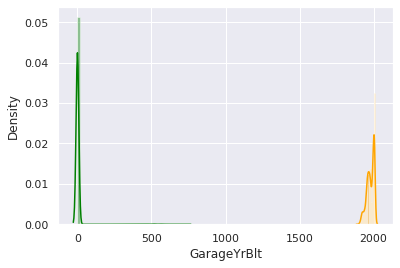

In [ ]:
# Let's plot the histogram for variable with skewness greater than 1.0 and also close to -1


#skewness and kurtosis
print("Skewness: %f" % train_df['PoolArea'].skew())
print("Kurtosis: %f" % train_df['PoolArea'].kurt())

sns.distplot(train_df['PoolArea'], color='green');

#skewness and kurtosis
print("Skewness: %f" % train_df['GarageYrBlt'].skew())
print("Kurtosis: %f" % train_df['GarageYrBlt'].kurt())

sns.distplot(train_df['GarageYrBlt'], color='orange');

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([  0,   0,   0, ..., 576, 648, 738])),
 (8.026637228673636, 2.7589041095890425, 0.19945061336501688))

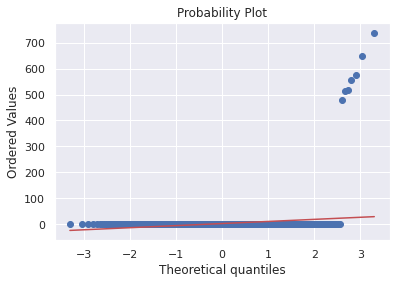

In [ ]:
stats.probplot(x=train_df['PoolArea'], dist=stats.norm(), plot=plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519414, 180921.19589041095, 0.9319665641512983))

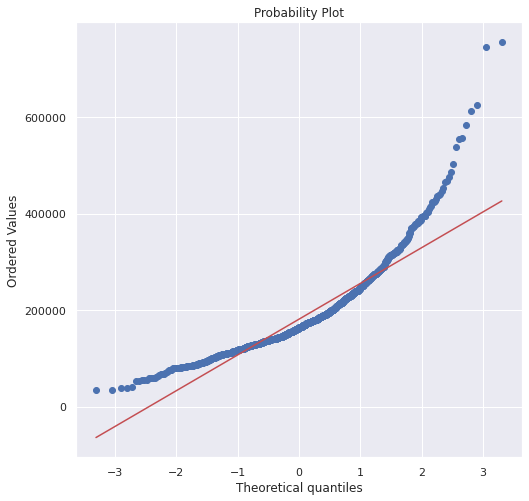

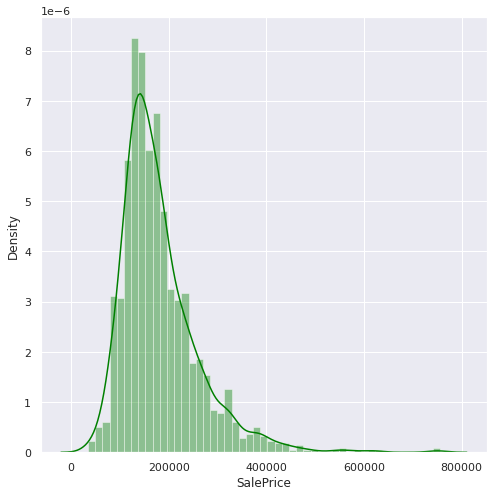

In [ ]:
# Review salesprice distribution
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
#fig, axes = plt.subplots(1, 2)
stats.probplot(x=train_df["SalePrice"], dist=stats.norm(), plot=plt)
plt.show()

fig, ax = plt.subplots(1, 1, figsize = (8, 8))
sns.distplot(train_df['SalePrice'], color='green');
plt.show()

#train_df["SalePrice"].head()


### We can identify the skewness in the train data and SalePrice using distribution plot or Q-Q plot.

####SalePrice distribution is right skewed and most of the house priced between 100-400K, while there are very few around 600 - 800K.

### Now we will review the correlation of SalesPrice with other fields to find the fields with most impact on the SalesPrice

In [ ]:
# feature creation
# Reference code: https://www.kaggle.com/chanakyavivekkapoor/house-price-prediction#NULL-Values



train_df['HasPool'] = train_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train_df['Has2ndFloor'] = train_df['2ndFlrSF'].apply(lambda x : 1 if x > 0 else 0)
train_df['HasGarage'] = train_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train_df['HasBsmt'] = train_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train_df['HasFireplace'] = train_df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']
train_df['Total_Bathrooms'] = (train_df['FullBath'] + (0.5 * train_df['HalfBath']) +
                                   train_df['BsmtFullBath'] + (0.5 * train_df['BsmtHalfBath']))
    
train_df['Total_porch_sf'] = (train_df['OpenPorchSF'] + train_df['3SsnPorch'] +
                                  train_df['EnclosedPorch'] + train_df['ScreenPorch'])

# Add years since remodel
train_df['YearsSinceRemodel'] = train_df['YrSold'].astype(int) - train_df['YearRemodAdd'].astype(int)



num_fields.append("HasPool")
num_fields.append("Has2ndFloor")
num_fields.append("HasGarage")
num_fields.append("HasBsmt")
num_fields.append("HasFireplace")
num_fields.append("TotalSF")
num_fields.append("Total_Bathrooms")


corr = train_df[num_fields].corr()
corrl = corr.nlargest(len(num_fields), 'SalePrice')['SalePrice']
#print(strng_corr.iloc[1])
corrl

SalePrice          1.000000
OverallQual        0.790982
TotalSF            0.782260
GrLivArea          0.708624
GarageCars         0.640409
Total_Bathrooms    0.631731
GarageArea         0.623431
TotalBsmtSF        0.613581
1stFlrSF           0.605852
FullBath           0.560664
TotRmsAbvGrd       0.533723
GarageYrBlt        0.486362
MasVnrArea         0.477493
HasFireplace       0.471908
Fireplaces         0.466929
BsmtFinSF1         0.386420
LotFrontage        0.351799
WoodDeckSF         0.324413
2ndFlrSF           0.319334
OpenPorchSF        0.315856
HalfBath           0.284108
LotArea            0.263843
HasGarage          0.236832
BsmtFullBath       0.227122
BsmtUnfSF          0.214479
BedroomAbvGr       0.168213
HasBsmt            0.152829
Has2ndFloor        0.137656
ScreenPorch        0.111447
HasPool            0.093708
PoolArea           0.092404
MoSold             0.046432
3SsnPorch          0.044584
BsmtFinSF2        -0.011378
BsmtHalfBath      -0.016844
MiscVal           -0

In [ ]:
# Find variables with correlation > .50

corr_gt70 = list(corrl[corrl.values > .70].index)
corr_lt70 = list(corrl[corrl.values <= .70].index)

corr_gt70.remove('SalePrice')

print("{} numerical variables has strong correlation (> 0.50) with SalesPrice".format(len(corr_gt70)))

print(corr_gt70)
print('\n')
print(corr_lt70)

corr_gt70[0]



3 numerical variables has strong correlation (> 0.50) with SalesPrice
['OverallQual', 'TotalSF', 'GrLivArea']


['GarageCars', 'Total_Bathrooms', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'MasVnrArea', 'HasFireplace', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'HasGarage', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'HasBsmt', 'Has2ndFloor', 'ScreenPorch', 'HasPool', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'Id', 'LowQualFinSF', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr']


'OverallQual'

In [ ]:
def display_stat(col, df):
  num_cols = col
  train = df
  for i in range(4):
    mean = train[num_cols[i]].mean()
    std = train[num_cols[i]].std()
    skew = train[num_cols[i]].skew()
    kurtosis = train[num_cols[i]].kurtosis()
    print(num_cols[i]+':')
    print('mean: {0:.4f}, std: {1:.4f}, skew: {2:.4f}, kurtosis: {3:.4f} '.format(mean, std, skew, kurtosis))

In [ ]:
num_cols = ['SalePrice','OverallQual', 'TotalSF', 'GrLivArea']
display_stat(num_cols, train_df)

SalePrice:
mean: 180921.1959, std: 79442.5029, skew: 1.8829, kurtosis: 6.5363 
OverallQual:
mean: 6.0993, std: 1.3830, skew: 0.2169, kurtosis: 0.0963 
TotalSF:
mean: 2567.0486, std: 821.7144, skew: 1.7767, kurtosis: 12.6220 
GrLivArea:
mean: 1515.4637, std: 525.4804, skew: 1.3666, kurtosis: 4.8951 


**StandardScaler**

Remove the mean and adjust the data to unit variance. However, if there are outliers, the spread of the transformed data becomes very different by affecting the mean and standard deviation. Therefore, a balanced scale cannot be guaranteed if there are outliers.

Text(0.5, 1.0, 'Orginal SalePrice')

Text(0.5, 1.0, 'Standard Scaling SalePrice')

Text(0.5, 1.0, 'Standard Scaling SalePrice')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([-1.83870376, -1.83352844, -1.80092766, ...,  5.59185509,
          7.10289909,  7.22881942])),
 (0.9338272640436482, 3.011653511629684e-16, 0.9319665641512987))

Text(0.5, 1.0, 'Orginal OverallQual')

Text(0.5, 1.0, 'Standard Scaling OverallQual')

Text(0.5, 1.0, 'Standard Scaling OverallQual')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([-3.6884129 , -3.6884129 , -2.96509754, ...,  2.82142532,
          2.82142532,  2.82142532])),
 (0.9756097324777169, 2.2980466328305677e-16, 0.9736657788215168))

Text(0.5, 1.0, 'Orginal TotalSF')

Text(0.5, 1.0, 'Standard Scaling TotalSF')

Text(0.5, 1.0, 'Standard Scaling TotalSF')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([-2.71847945, -2.24856892, -2.23882984, ...,  5.24078234,
          6.38755882, 11.18162014])),
 (0.9581619968594614, -8.438335497868886e-17, 0.9562528087332868))

Text(0.5, 1.0, 'Orginal GrLivArea')

Text(0.5, 1.0, 'Standard Scaling GrLivArea')

Text(0.5, 1.0, 'Standard Scaling GrLivArea')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([-2.24912015, -2.05113819, -1.97118394, ...,  5.63589203,
          6.01662656,  7.85557436])),
 (0.9645558180317483, -5.51991364876721e-18, 0.9626338898809197))

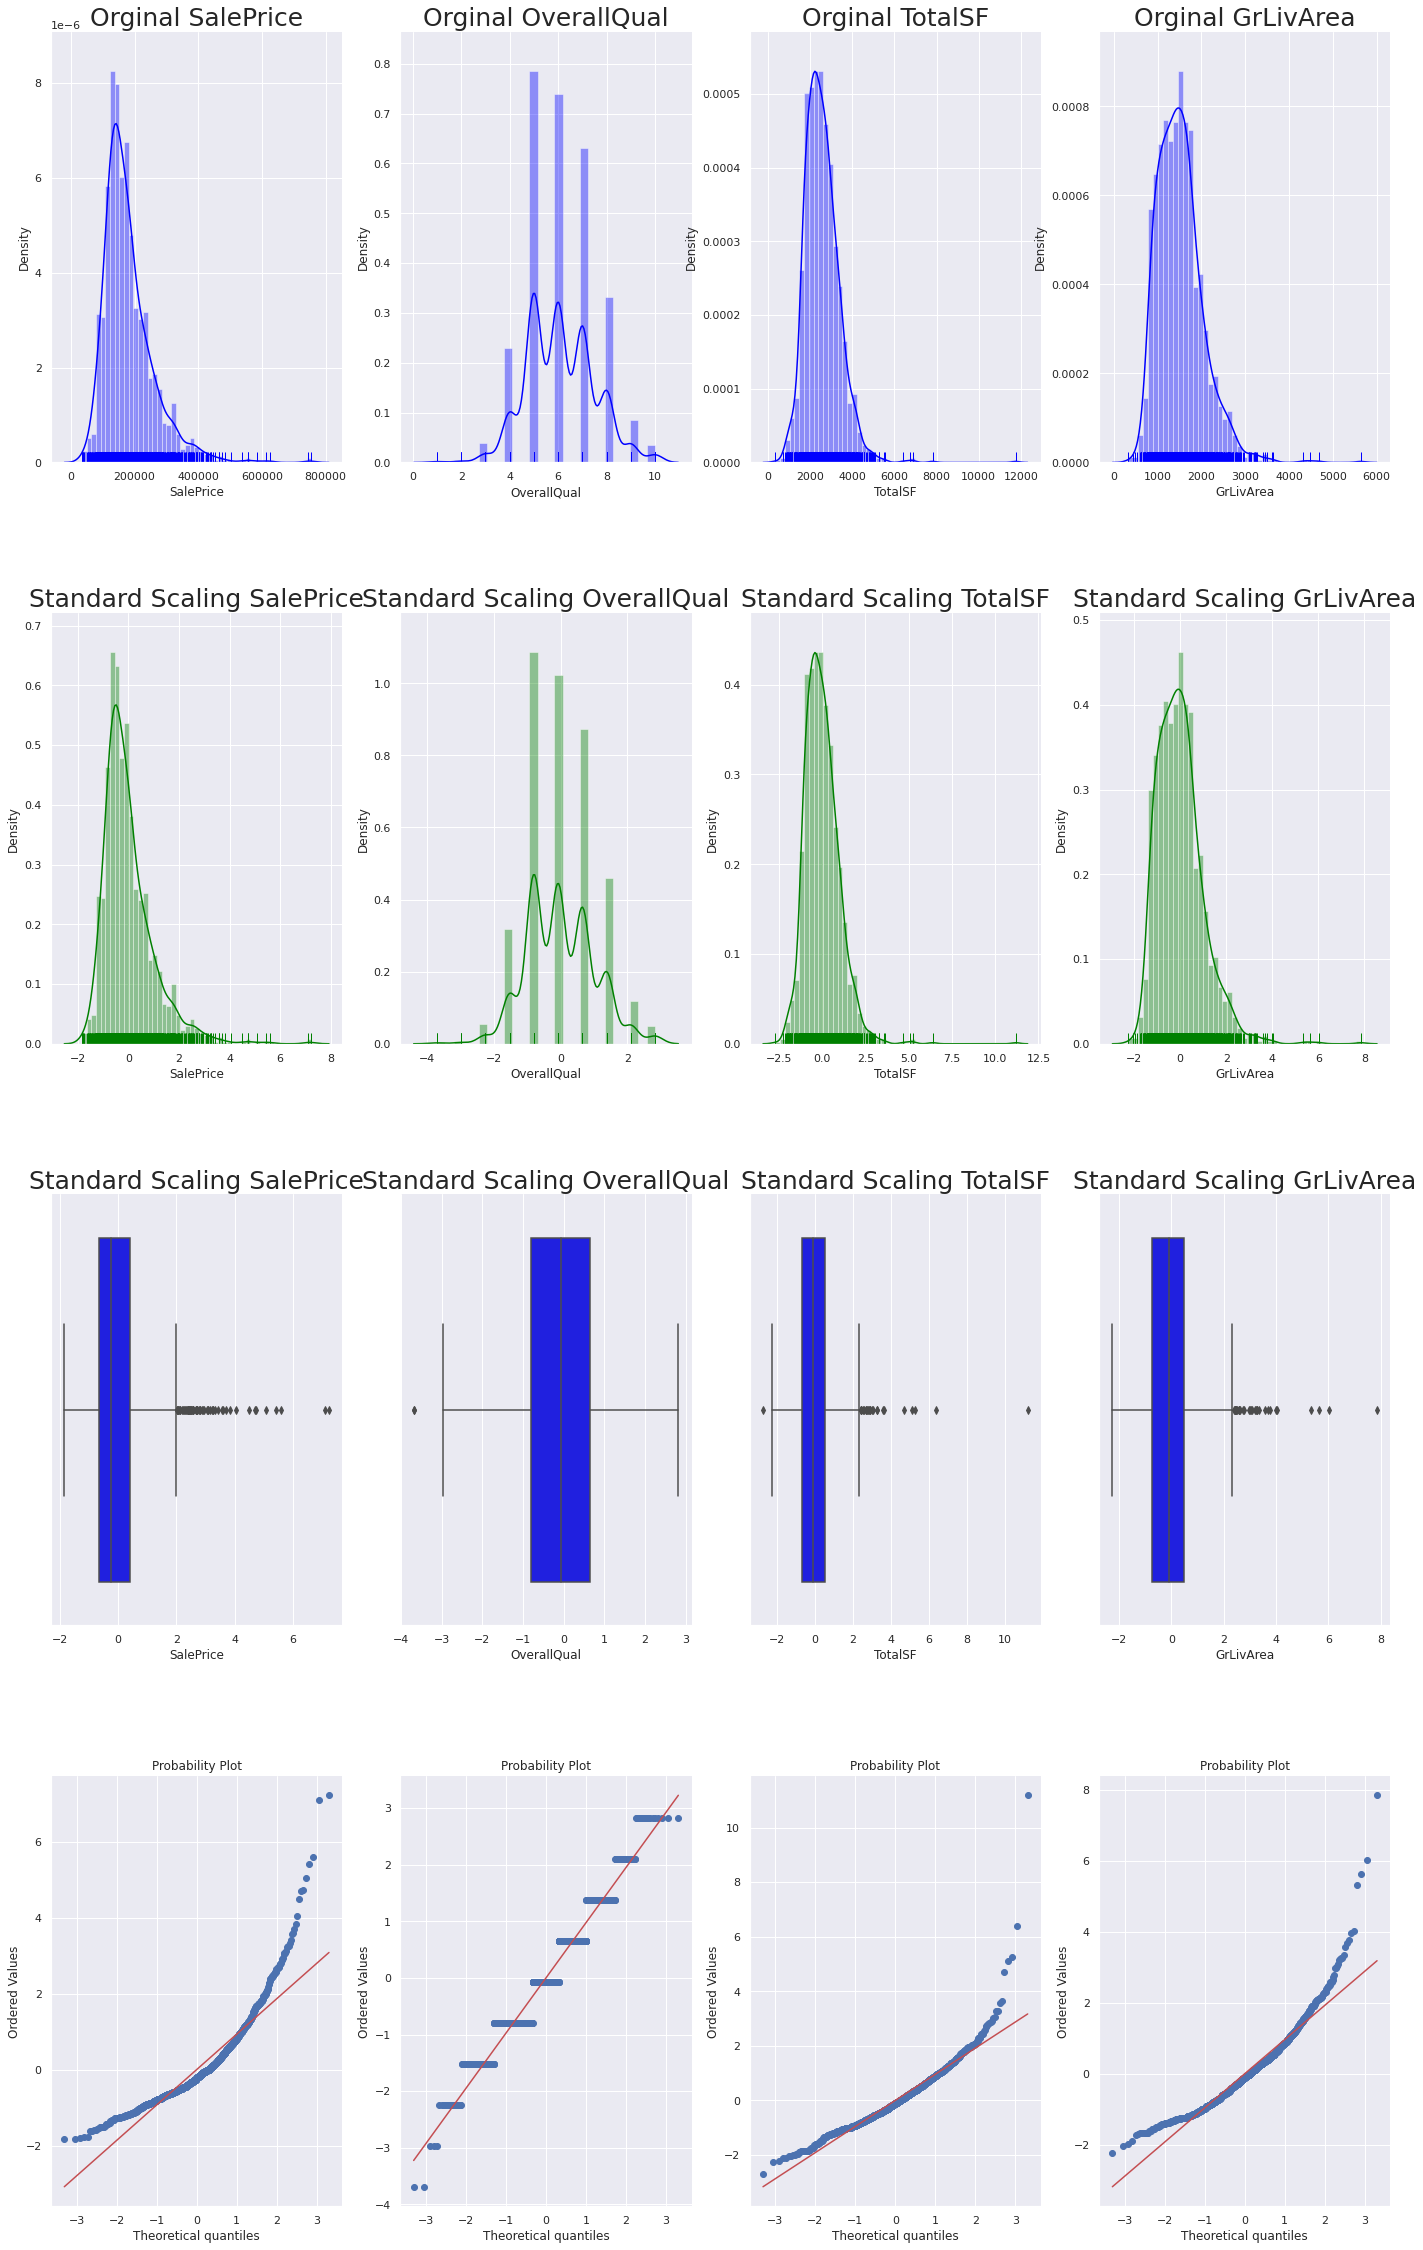

In [ ]:
# code reference: https://www.kaggle.com/ohseokkim/linear-nonlinear-scaling

from sklearn.preprocessing import StandardScaler
train_x = train_df.copy()
rcParams['figure.figsize'] = 24,40
fig, axes = plt.subplots(4, 4)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.35)
num_cols = ['SalePrice','OverallQual', 'TotalSF', 'GrLivArea']
for i in range(4):
    scaler = StandardScaler()
    train_x.loc[:,num_cols[i]] = scaler.fit_transform(train_x.loc[:,[num_cols[i]]])
    sns.distplot(train_df.loc[:,num_cols[i]],ax=axes[0,i],rug=True,color='blue')
    axes[0,i].set_title('Orginal '+num_cols[i],fontsize=25)
    sns.distplot(train_x.loc[:,num_cols[i]],ax=axes[1,i],rug=True,color='green')
    axes[1,i].set_title('Standard Scaling '+num_cols[i],fontsize=25)
    sns.boxplot(train_x.loc[:,num_cols[i]],ax=axes[2,i],color='blue')
    axes[2,i].set_title('Standard Scaling '+num_cols[i],fontsize=25)
    stats.probplot(train_x[num_cols[i]],plot = axes[3,i])
    sns.despine()

In [ ]:
# stats after standard scaling
display_stat(num_cols, train_x)

SalePrice:
mean: 0.0000, std: 1.0003, skew: 1.8829, kurtosis: 6.5363 
OverallQual:
mean: -0.0000, std: 1.0003, skew: 0.2169, kurtosis: 0.0963 
TotalSF:
mean: -0.0000, std: 1.0003, skew: 1.7767, kurtosis: 12.6220 
GrLivArea:
mean: -0.0000, std: 1.0003, skew: 1.3666, kurtosis: 4.8951 


** Standard Scaler** observations:
*   The distribution changed to the standard normal distribution.
*   Skewness and kurtosis remains same as original distribution.




**MinMaxScaler**

Rescale the data so that all feature values are between 0 and 1. However, if there is an outlier, the transformed value may be compressed into a very narrow range.

In other words, MinMaxScaler is also very sensitive to the existence of outliers.

Text(0.5, 1.0, 'Orginal SalePrice')

Text(0.5, 1.0, 'Standard Scaling SalePrice')

Text(0.5, 1.0, 'Standard Scaling SalePrice')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([0.00000000e+00, 5.70754062e-04, 4.16608804e-03, ...,
         8.19469518e-01, 9.86113040e-01, 1.00000000e+00])),
 (0.10298592521204578, 0.20277905275713234, 0.931966564151299))

Text(0.5, 1.0, 'Orginal OverallQual')

Text(0.5, 1.0, 'Standard Scaling OverallQual')

Text(0.5, 1.0, 'Standard Scaling OverallQual')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([0.        , 0.        , 0.11111111, ..., 1.        , 1.        ,
         1.        ])),
 (0.14986697053520287, 0.5665905631659056, 0.9736657788215174))

Text(0.5, 1.0, 'Orginal TotalSF')

Text(0.5, 1.0, 'Standard Scaling TotalSF')

Text(0.5, 1.0, 'Standard Scaling TotalSF')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([0.        , 0.03380627, 0.03450692, ..., 0.57260466, 0.65510597,
         1.        ])),
 (0.06893202386706156, 0.19557265984734512, 0.9562528087332869))

Text(0.5, 1.0, 'Orginal GrLivArea')

Text(0.5, 1.0, 'Standard Scaling GrLivArea')

Text(0.5, 1.0, 'Standard Scaling GrLivArea')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([0.        , 0.01959307, 0.02750565, ..., 0.78033157, 0.81801055,
         1.        ])),
 (0.09545620776656094, 0.2225817065994983, 0.9626338898809196))

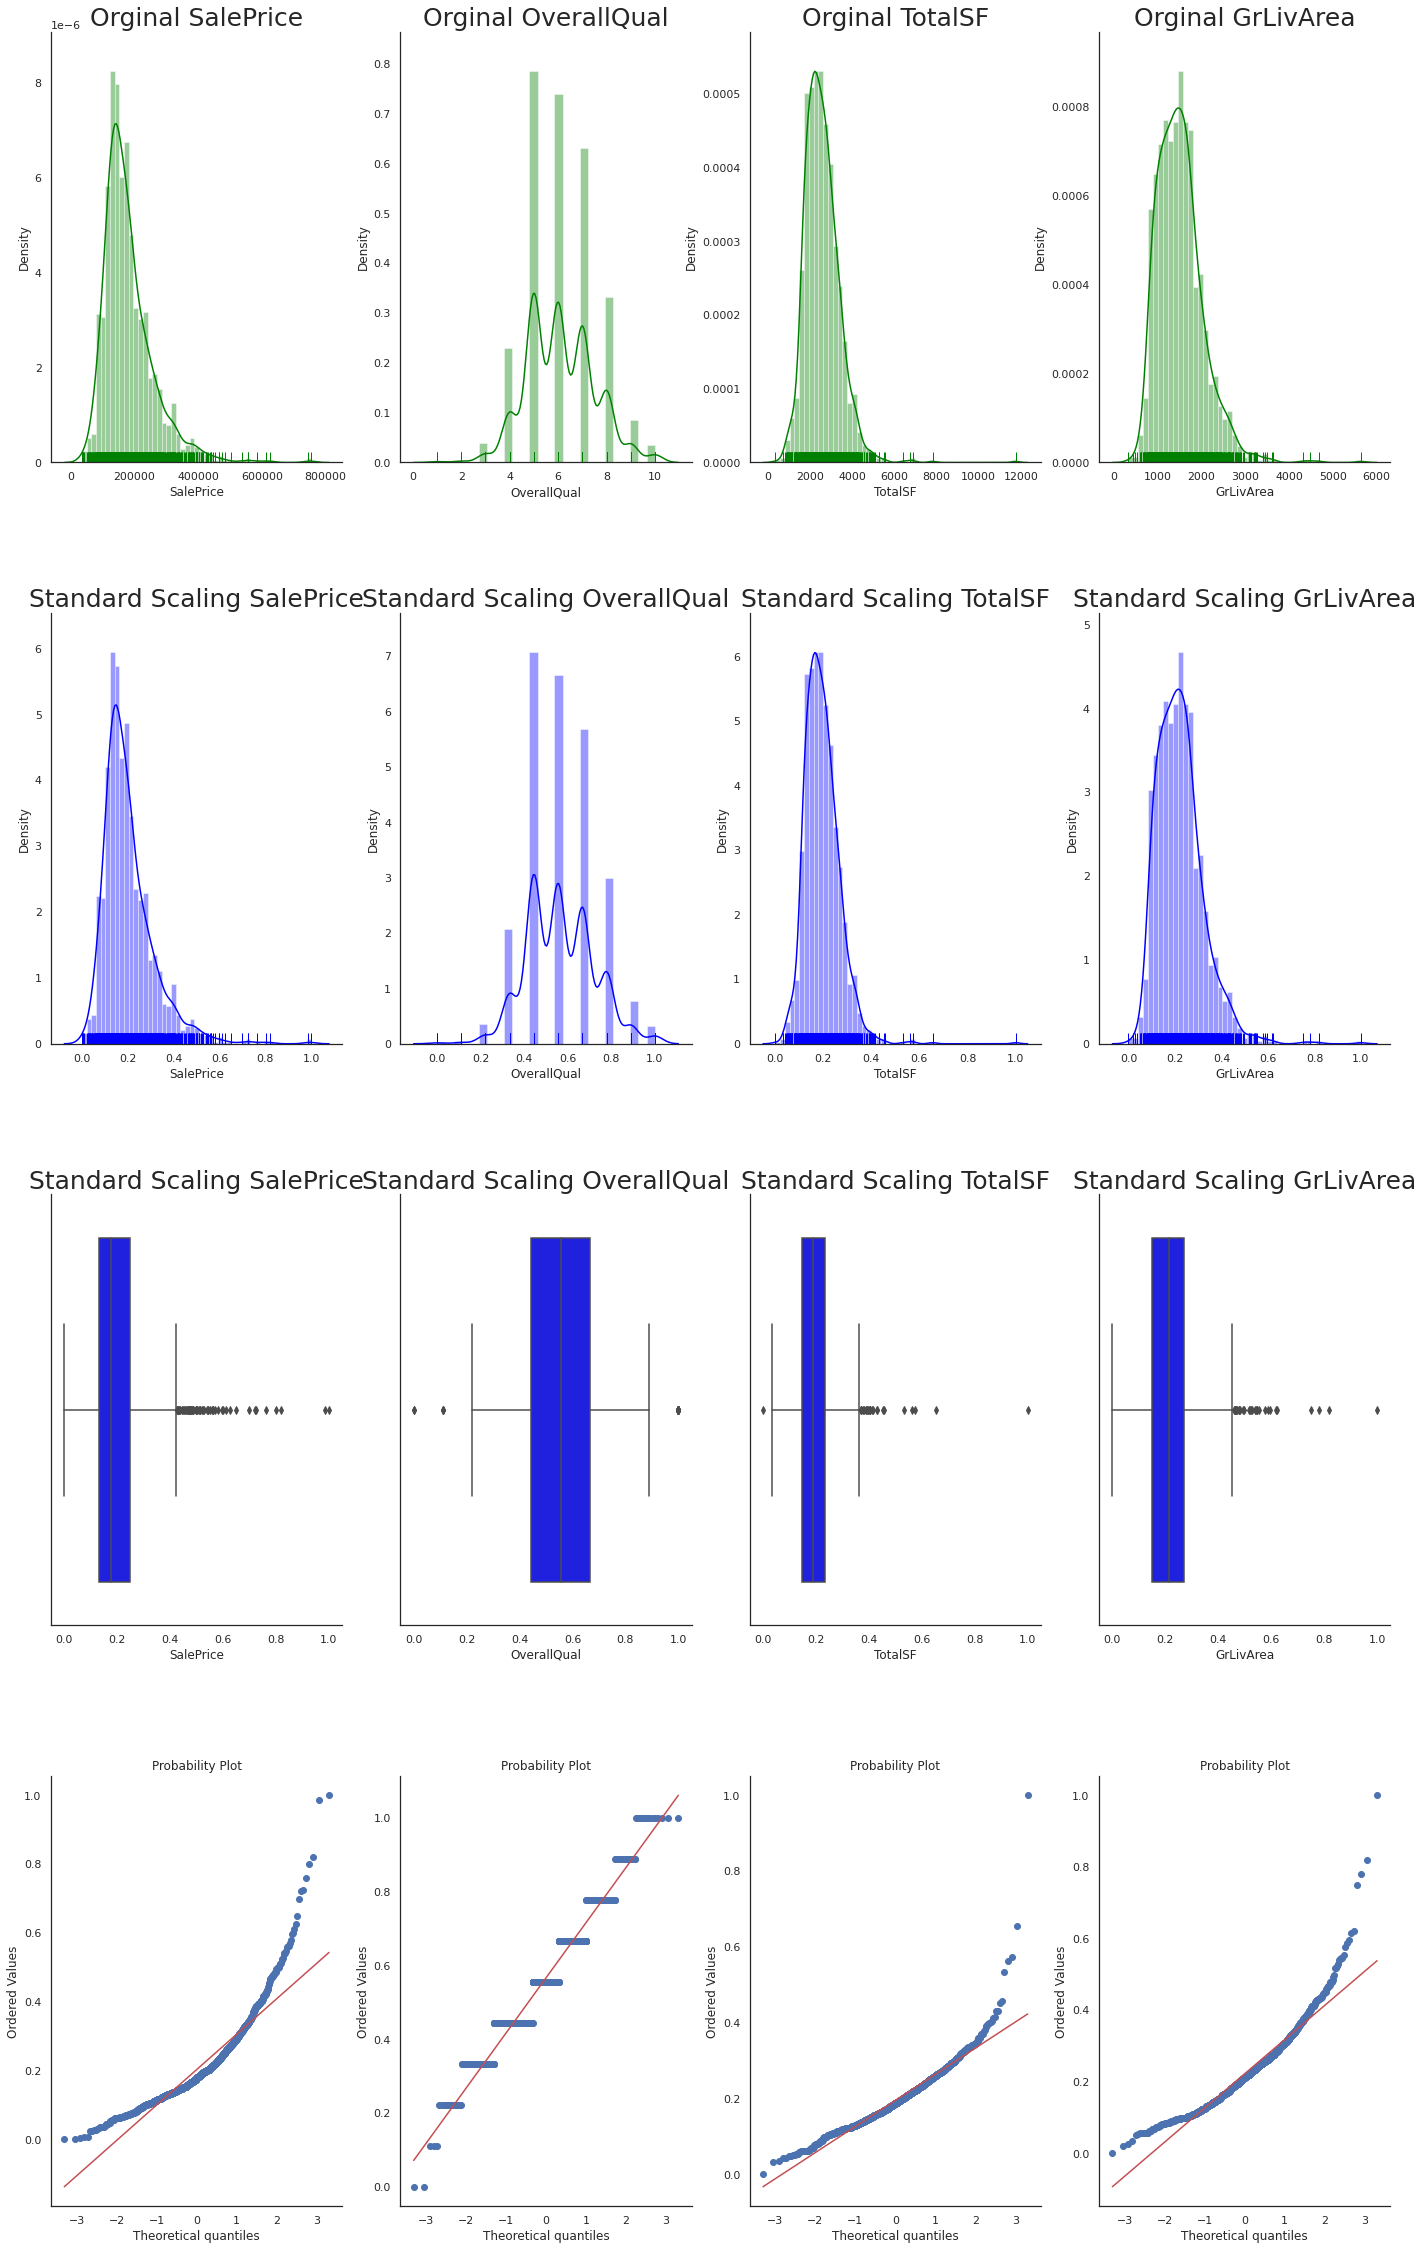

In [ ]:
from sklearn.preprocessing import MinMaxScaler
train_y = train_df.copy()
rcParams['figure.figsize'] = 24,40
fig, axes = plt.subplots(4, 4)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.35)

scaler = MinMaxScaler()
for i in range(4):
    train_y.loc[:,num_cols[i]] = scaler.fit_transform(train_y[[num_cols[i]]])
    sns.distplot(train_df.loc[:,num_cols[i]],ax=axes[0,i],rug=True,color='green')
    axes[0,i].set_title('Orginal '+num_cols[i],fontsize=25)
    sns.distplot(train_y.loc[:,num_cols[i]],ax=axes[1,i],rug=True,color='blue')
    axes[1,i].set_title('Standard Scaling '+num_cols[i],fontsize=25)
    sns.boxplot(train_y.loc[:,num_cols[i]],ax=axes[2,i],color='blue')
    axes[2,i].set_title('Standard Scaling '+num_cols[i],fontsize=25)
    stats.probplot(train_y[num_cols[i]],plot = axes[3,i])
    sns.despine()

In [ ]:
# stats after standard scaling
display_stat(num_cols, train_y)

SalePrice:
mean: 0.2028, std: 0.1103, skew: 1.8829, kurtosis: 6.5363 
OverallQual:
mean: 0.5666, std: 0.1537, skew: 0.2169, kurtosis: 0.0963 
TotalSF:
mean: 0.1956, std: 0.0720, skew: 1.7767, kurtosis: 12.6220 
GrLivArea:
mean: 0.2226, std: 0.0990, skew: 1.3666, kurtosis: 4.8951 


MinMaxScaler observations:
*   The distribution is mapped between 0 and 1 while maintaining the shape of the original distribution.
*   Skewness and kurtosis remains same as original distribution.



In [ ]:
corr = train_df[num_fields].corr()
corrl = corr.nlargest(len(num_fields), 'SalePrice')['SalePrice']
#print(strng_corr.iloc[1])
corrl

SalePrice          1.000000
OverallQual        0.790982
TotalSF            0.782260
GrLivArea          0.708624
GarageCars         0.640409
Total_Bathrooms    0.631731
GarageArea         0.623431
TotalBsmtSF        0.613581
1stFlrSF           0.605852
FullBath           0.560664
TotRmsAbvGrd       0.533723
GarageYrBlt        0.486362
MasVnrArea         0.477493
HasFireplace       0.471908
Fireplaces         0.466929
BsmtFinSF1         0.386420
LotFrontage        0.351799
WoodDeckSF         0.324413
2ndFlrSF           0.319334
OpenPorchSF        0.315856
HalfBath           0.284108
LotArea            0.263843
HasGarage          0.236832
BsmtFullBath       0.227122
BsmtUnfSF          0.214479
BedroomAbvGr       0.168213
HasBsmt            0.152829
Has2ndFloor        0.137656
ScreenPorch        0.111447
HasPool            0.093708
PoolArea           0.092404
MoSold             0.046432
3SsnPorch          0.044584
BsmtFinSF2        -0.011378
BsmtHalfBath      -0.016844
MiscVal           -0

### This means the following variables has strong correlation with the SalePrice, hence will be helpful with prediction

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']



In [ ]:
num_strng_corr = corr_gt70
num_strng_corr.append("SalePrice")
num_strng_corr[0]


'OverallQual'

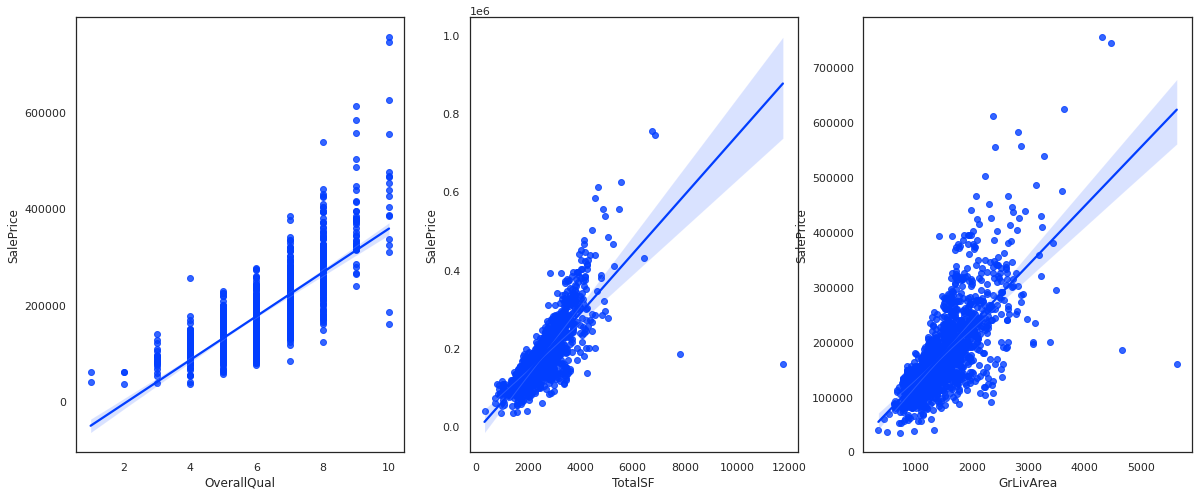

In [ ]:


fig, ax = plt.subplots(1, 3, figsize = (20, 8))


for i, ax in enumerate(fig.axes):
  if i < len(num_strng_corr) - 1:
    sns.regplot(x = num_strng_corr[i],y='SalePrice', data=train_df, ax=ax)
    #sns.violinplot(x = num_strng_corr[i],y='SalePrice', data=train_df, ax = ax)

plt.show()



In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(train_df, x="TotalSF", y="SalePrice", color="GrLivArea", 
                 marginal_x="box", marginal_y="violin",
                  title="SalesPrice distribution against Total Sq. ft. and Ground Living Area Sq. ft. ")
fig.show()

In [ ]:


import plotly.express as px
df = px.data.iris()
fig = px.scatter(train_df, x="TotalSF", y="SalePrice", color="TotalSF", 
                 marginal_x="box", marginal_y="violin",
                  title="Click on the legend items!")
fig.show()

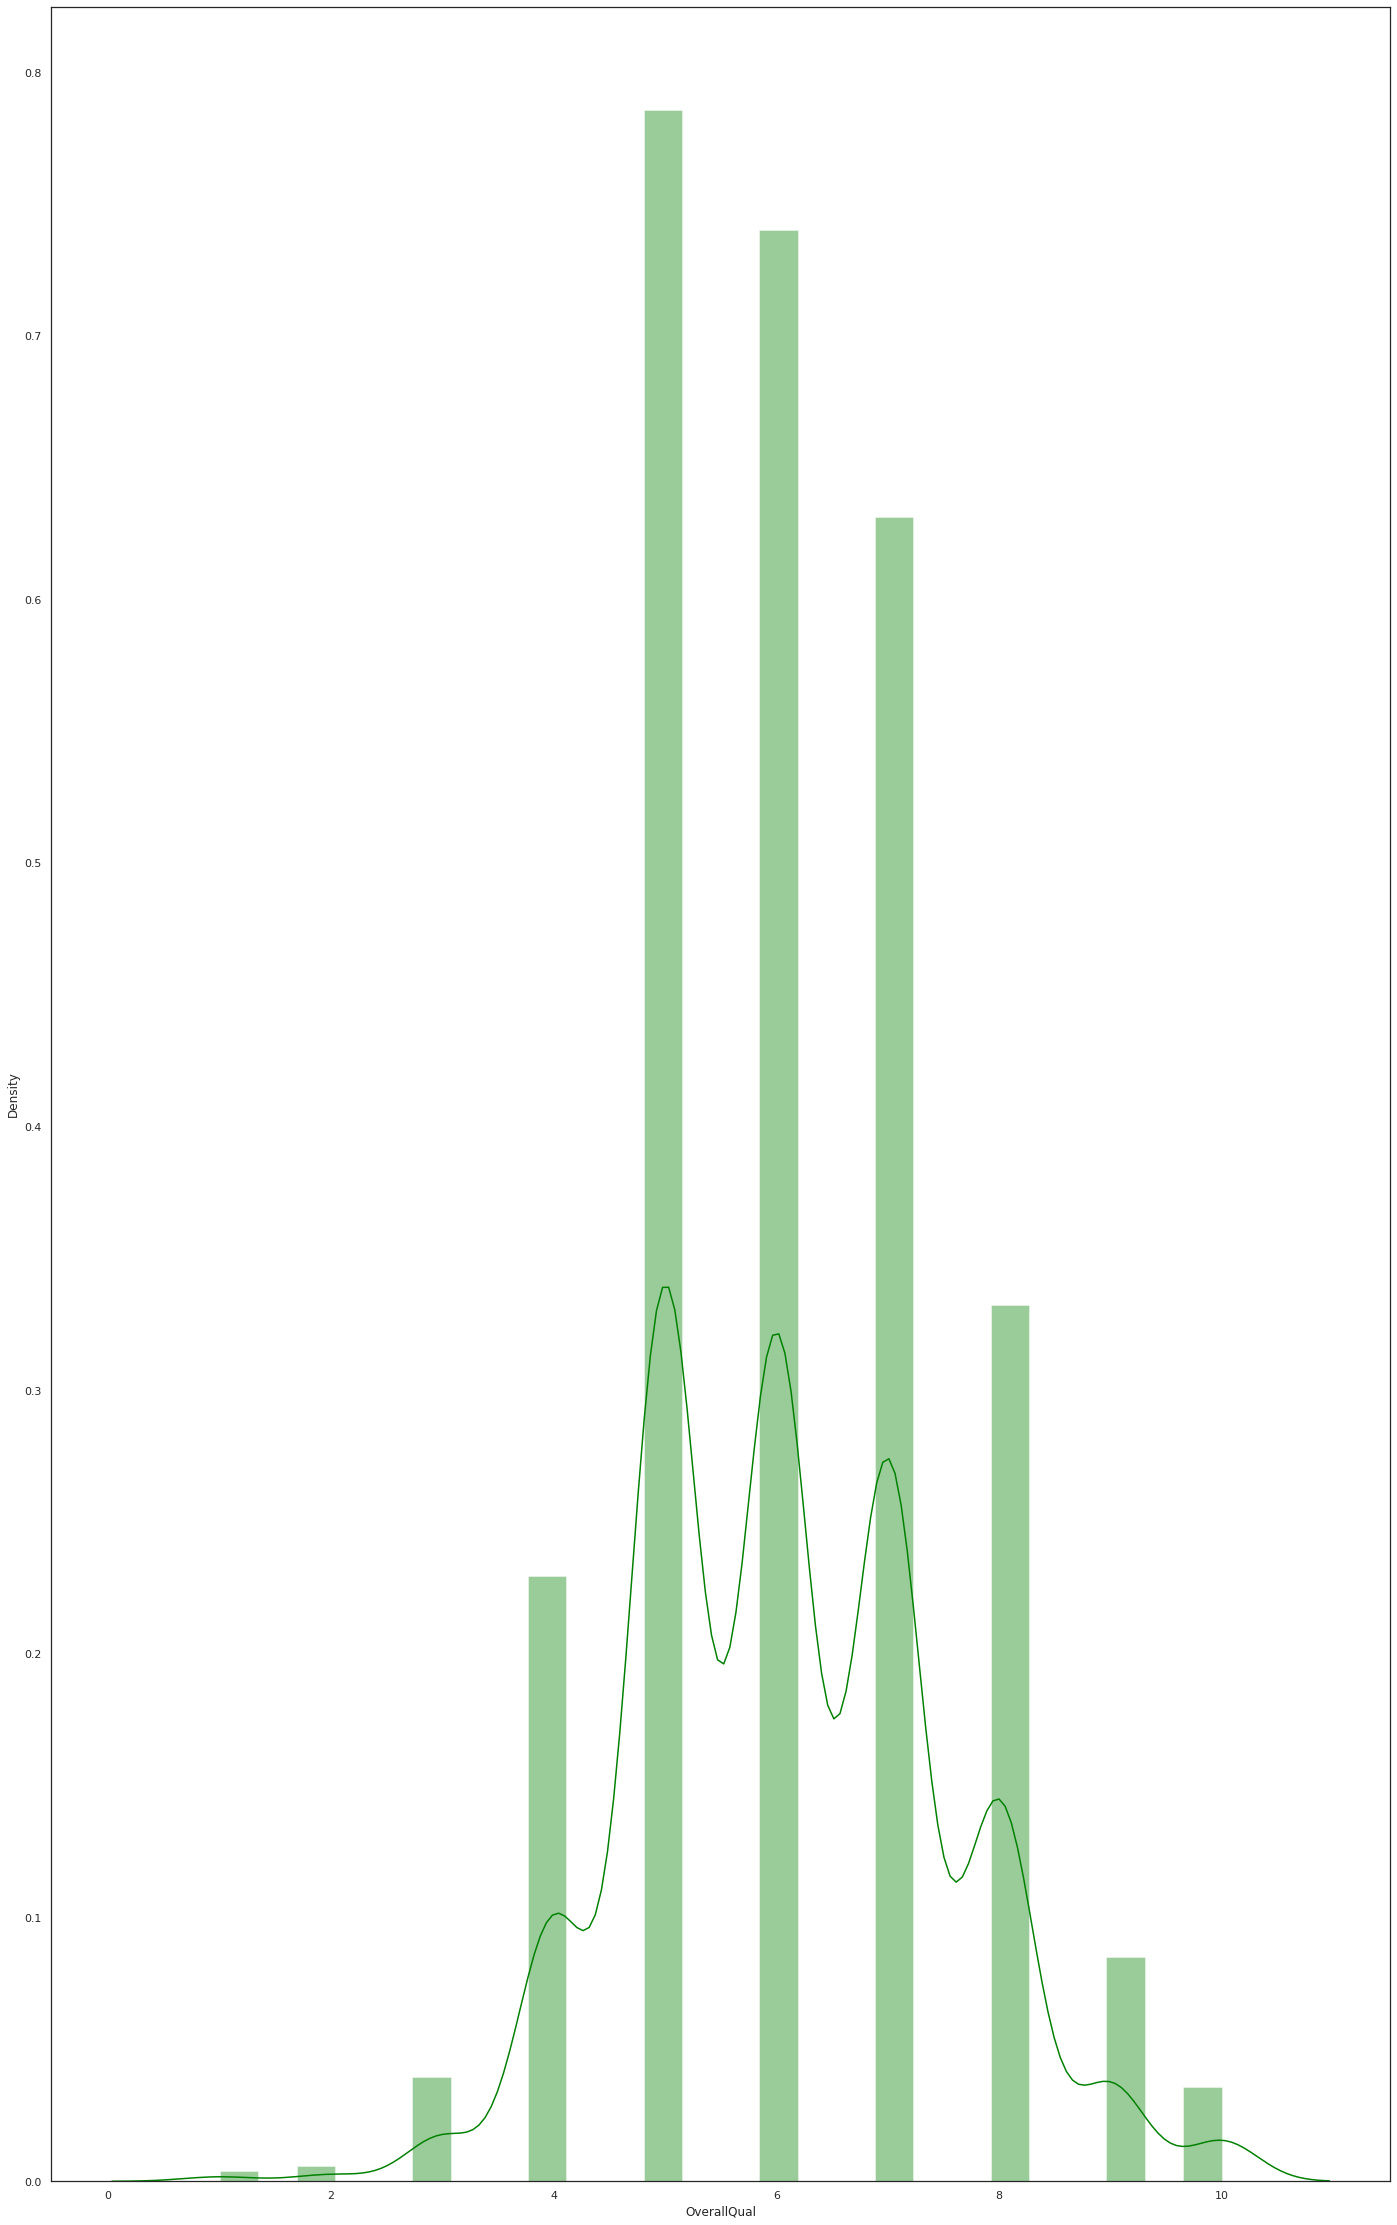

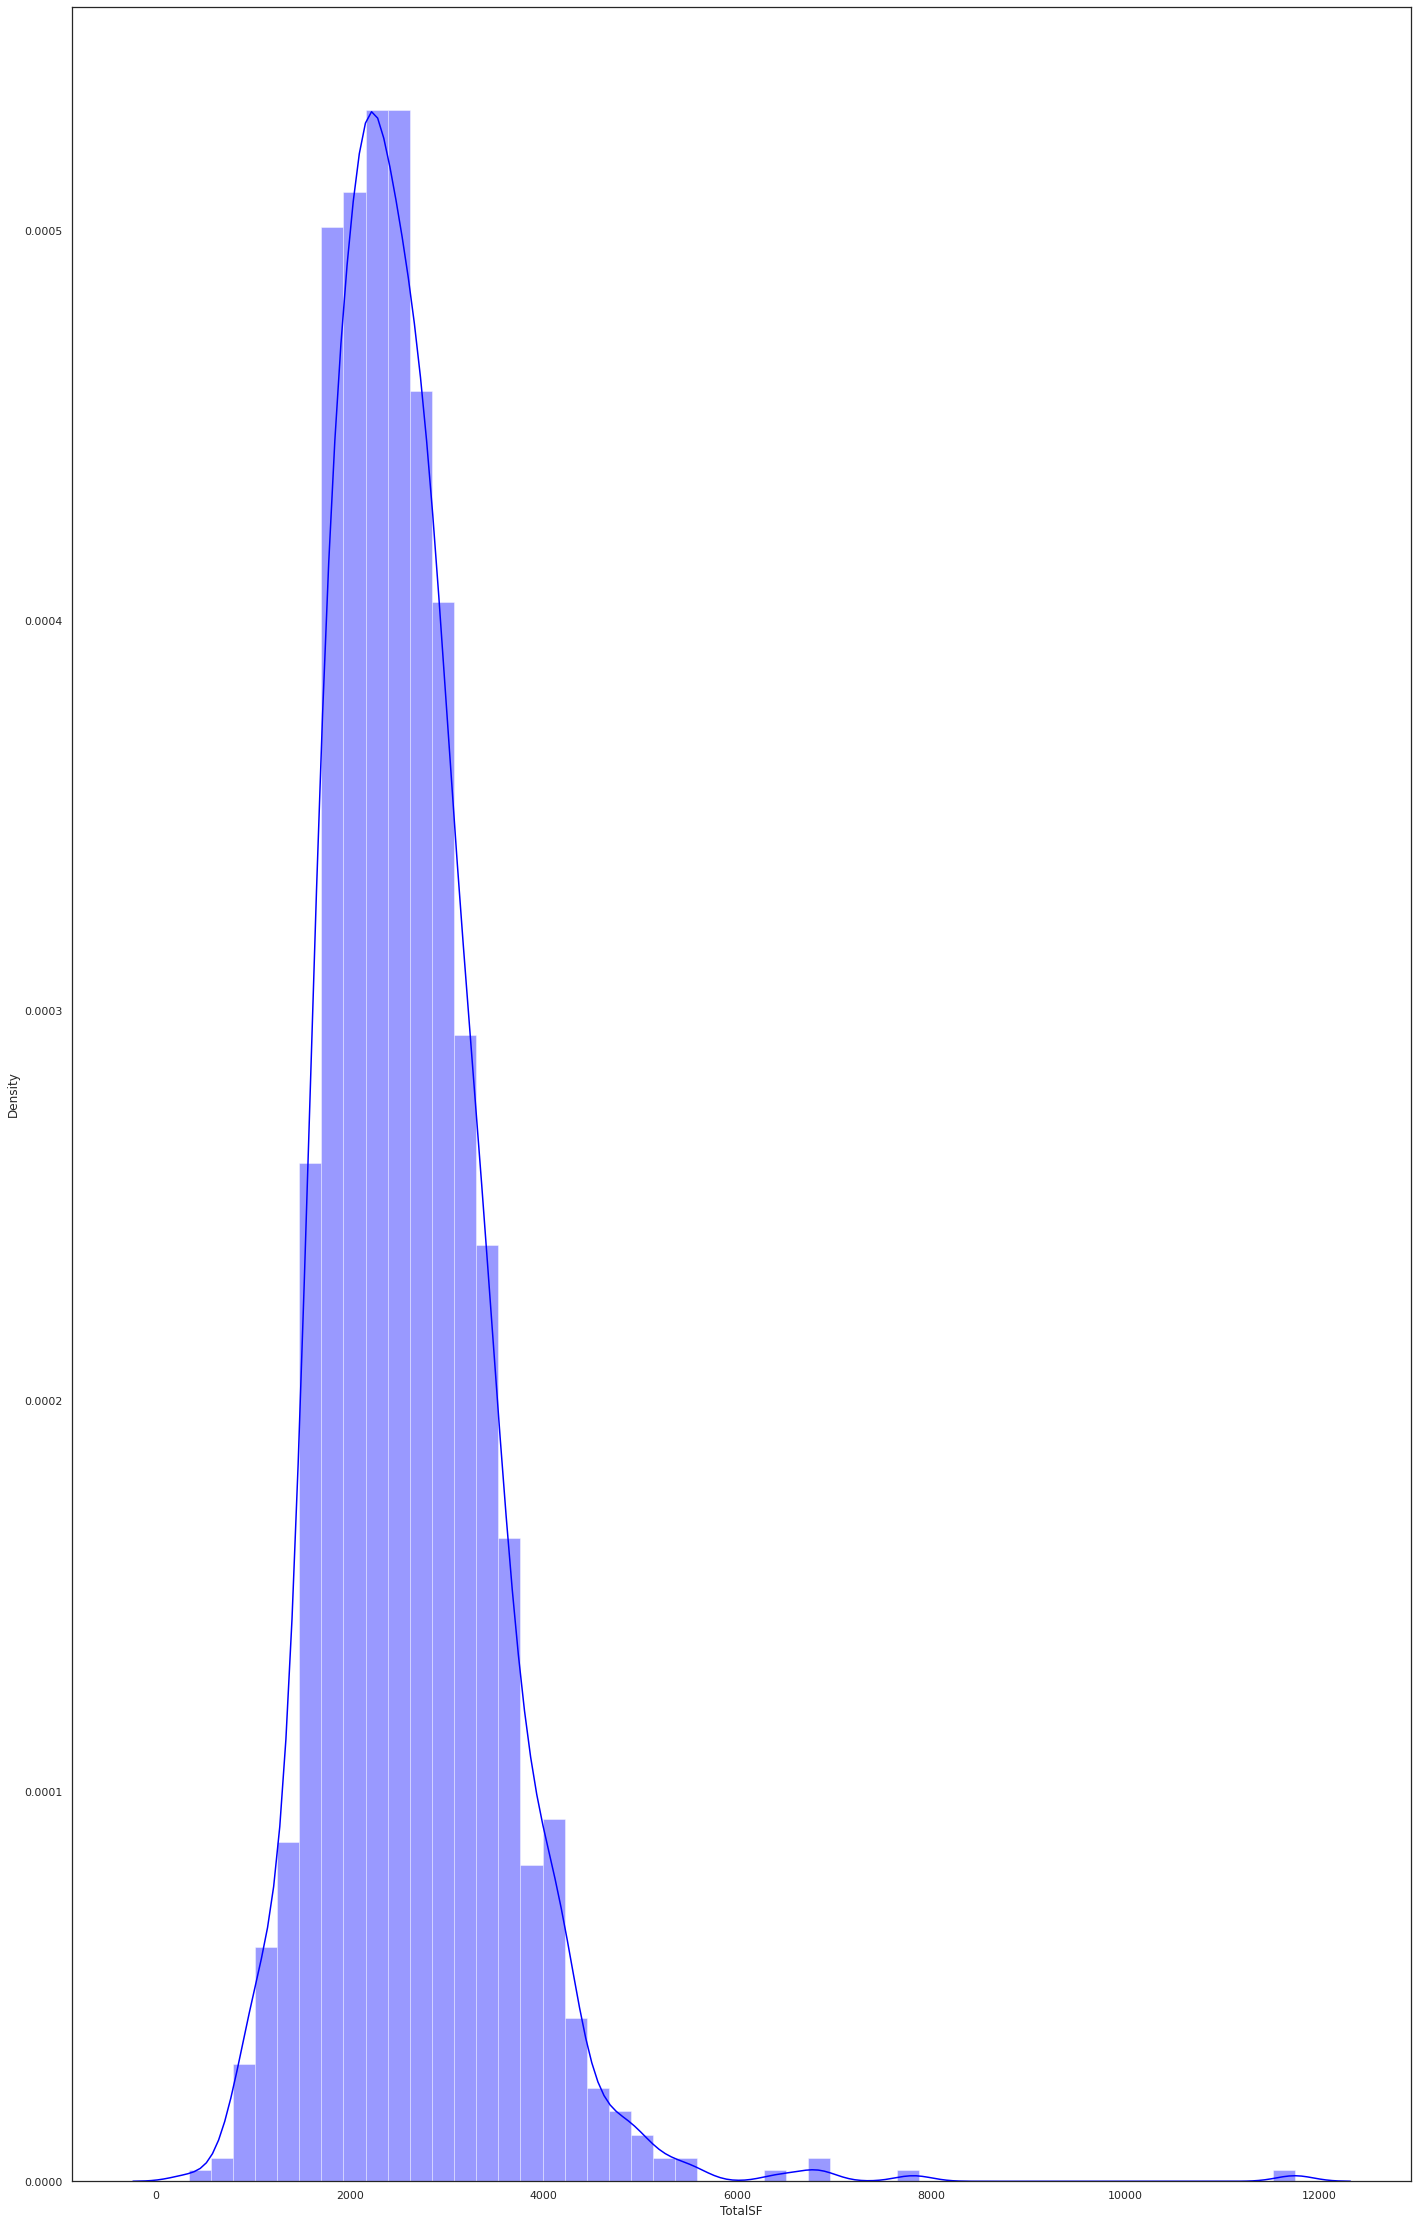

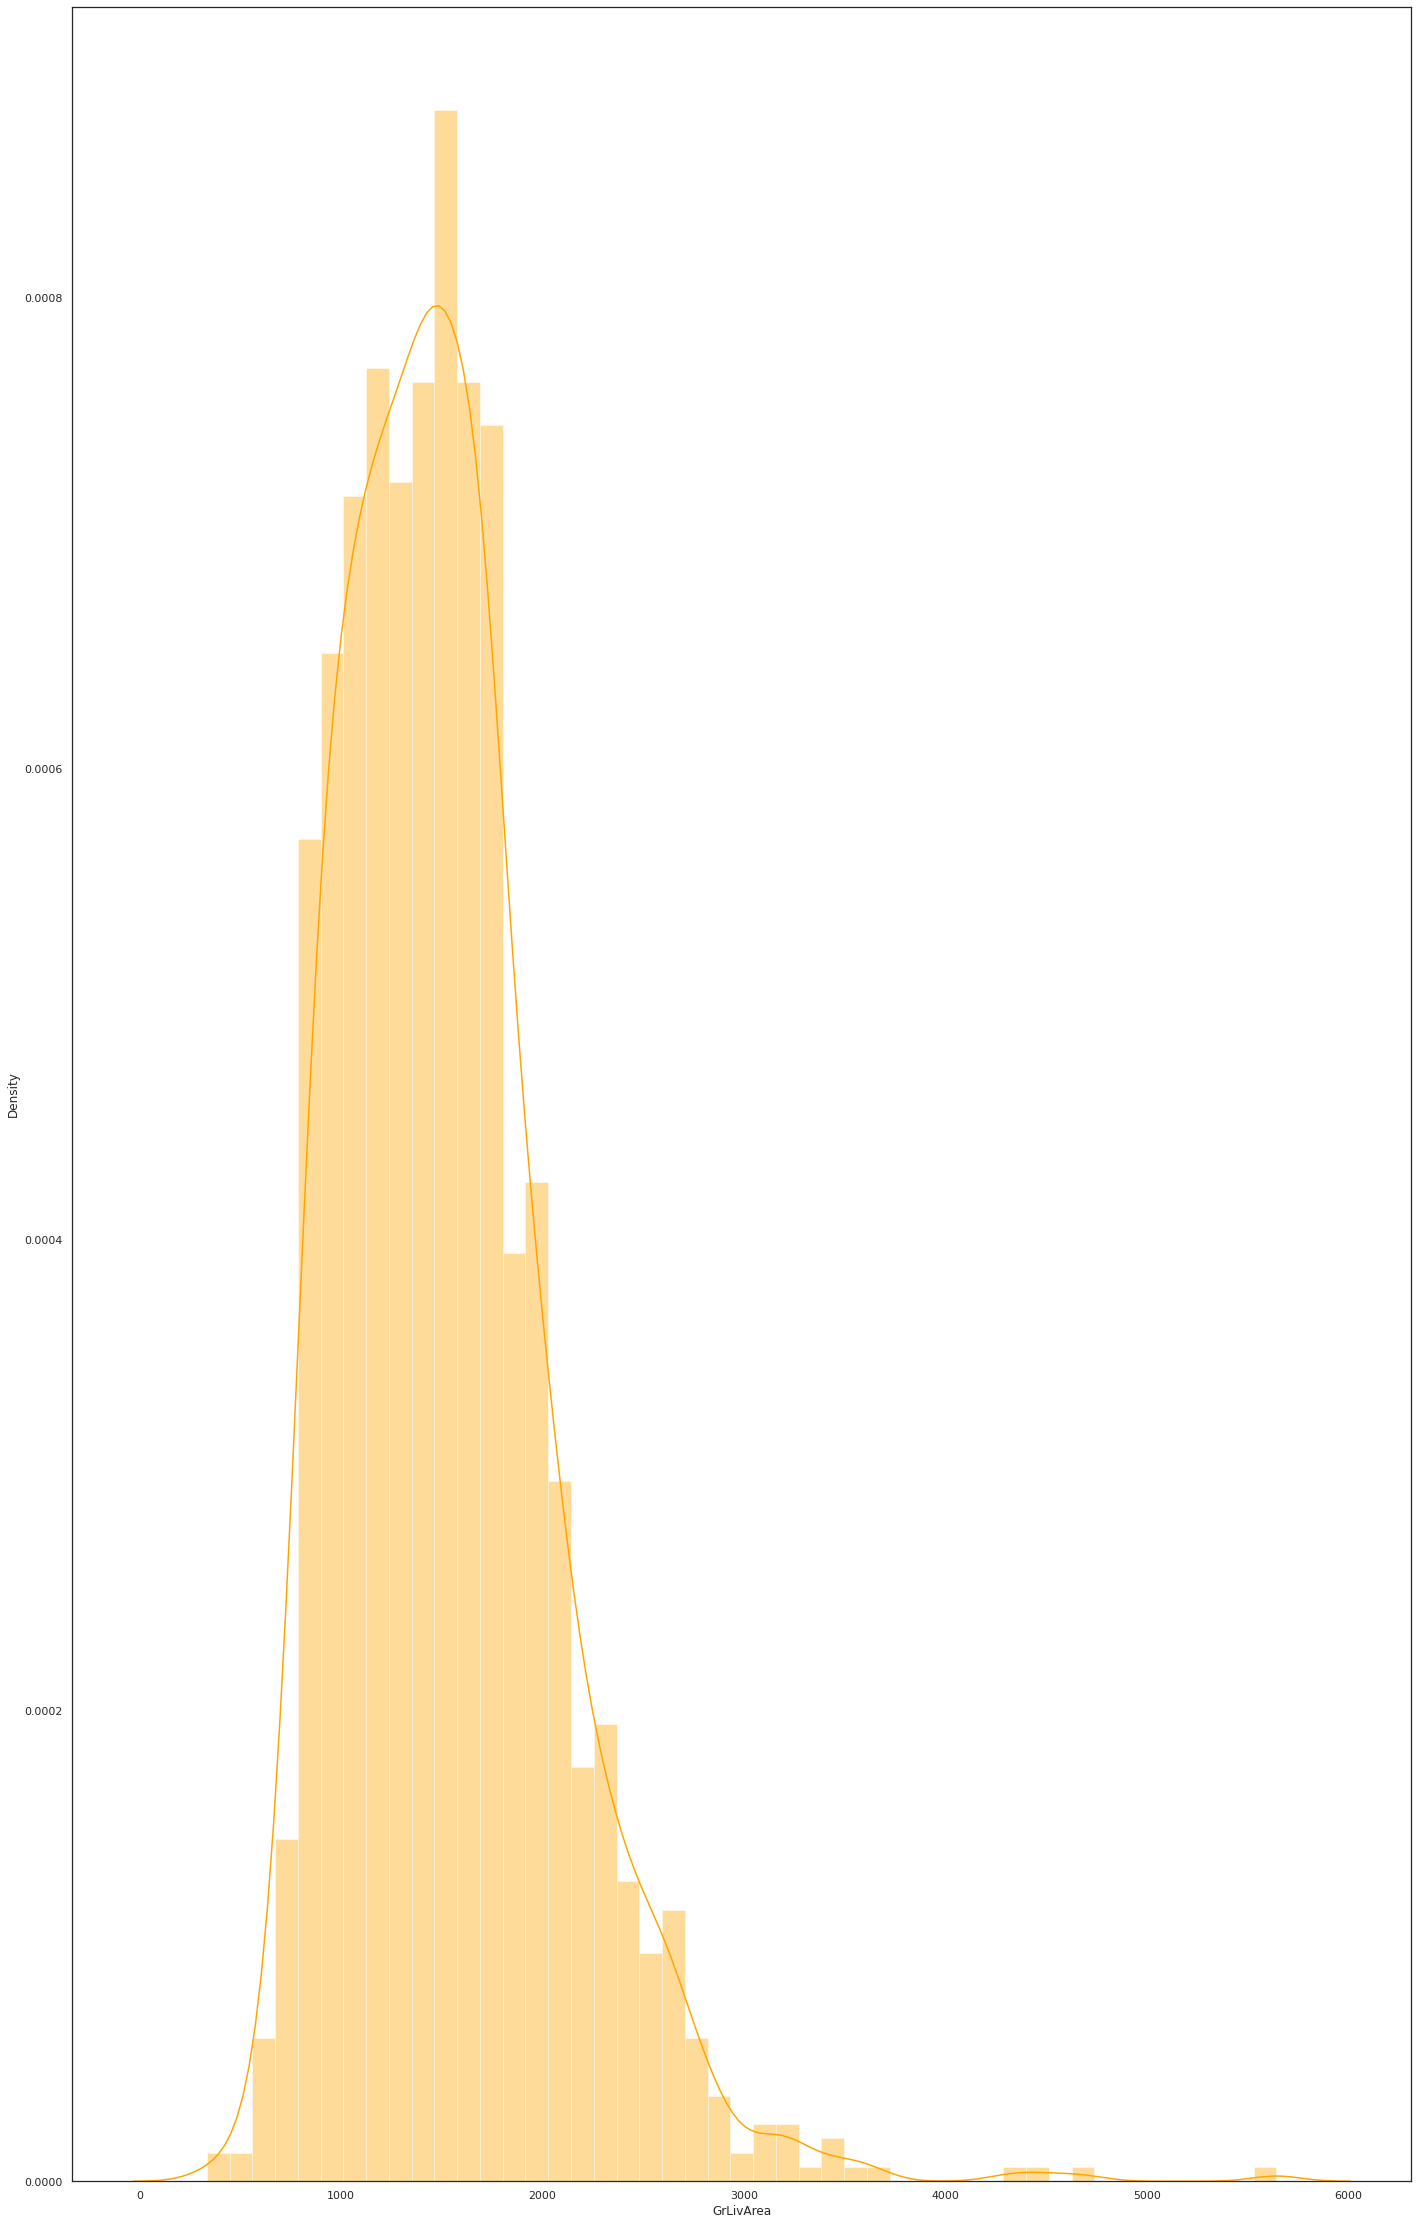

In [ ]:

sns.distplot(train_df[num_strng_corr[0]], color='green')
plt.show()
sns.distplot(train_df[num_strng_corr[1]], color='blue')
plt.show()
sns.distplot(train_df[num_strng_corr[2]], color='orange')
plt.show()

# Analyze categorical data

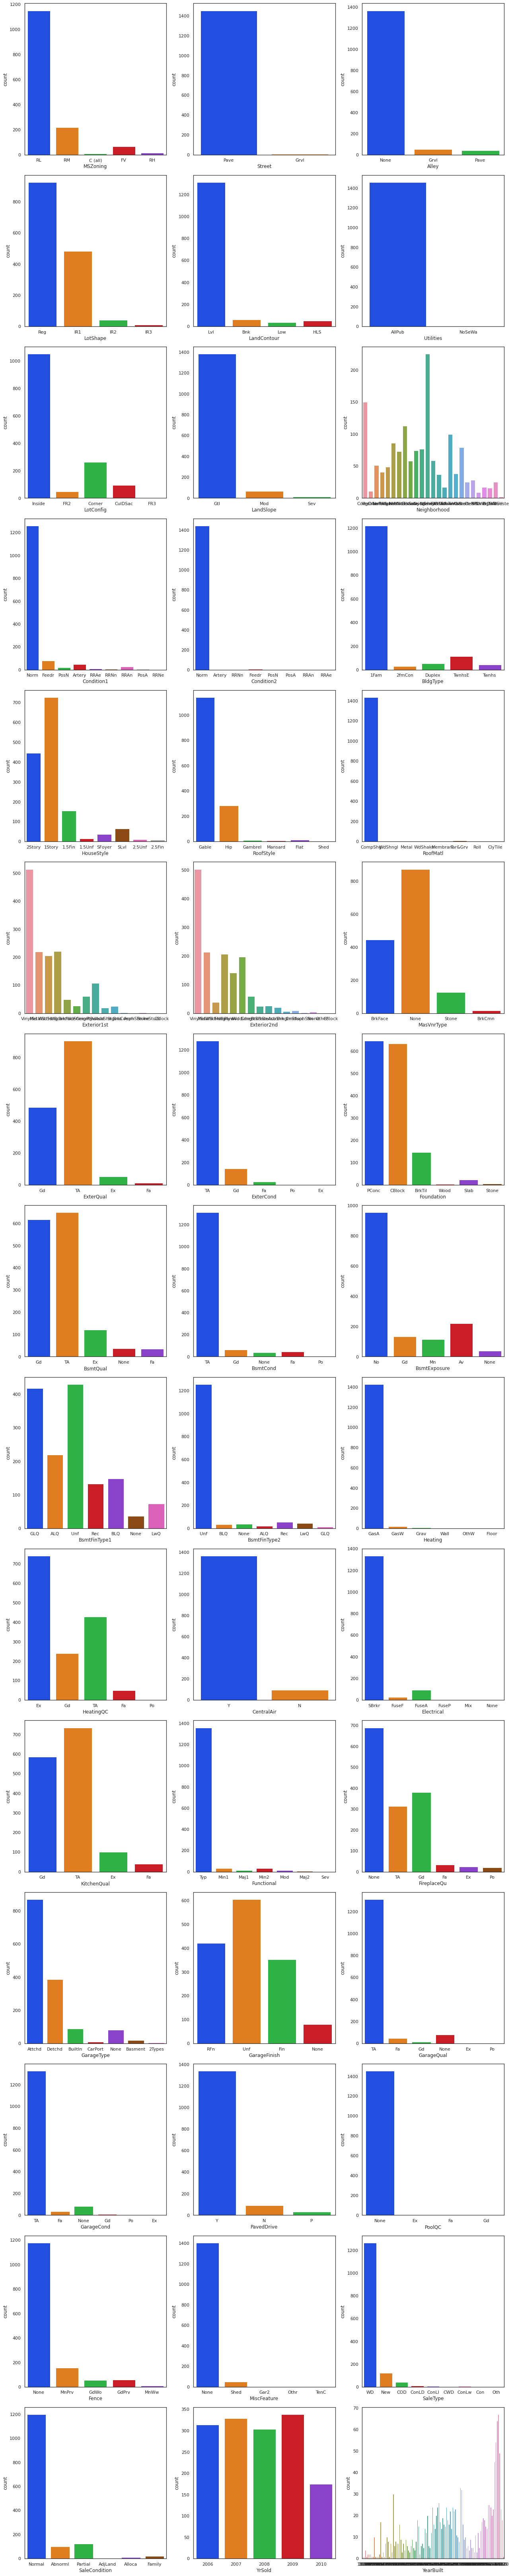

In [ ]:
# Analyze each category using barplot
#https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/

rows = 15
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols*6,rows*6))

for r in range(0,rows):
    for c in range(0,cols):  
        i = r*cols+c
        if i < len(cat_fields):
            sns.countplot(x=cat_fields[i], data=train_df, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()   



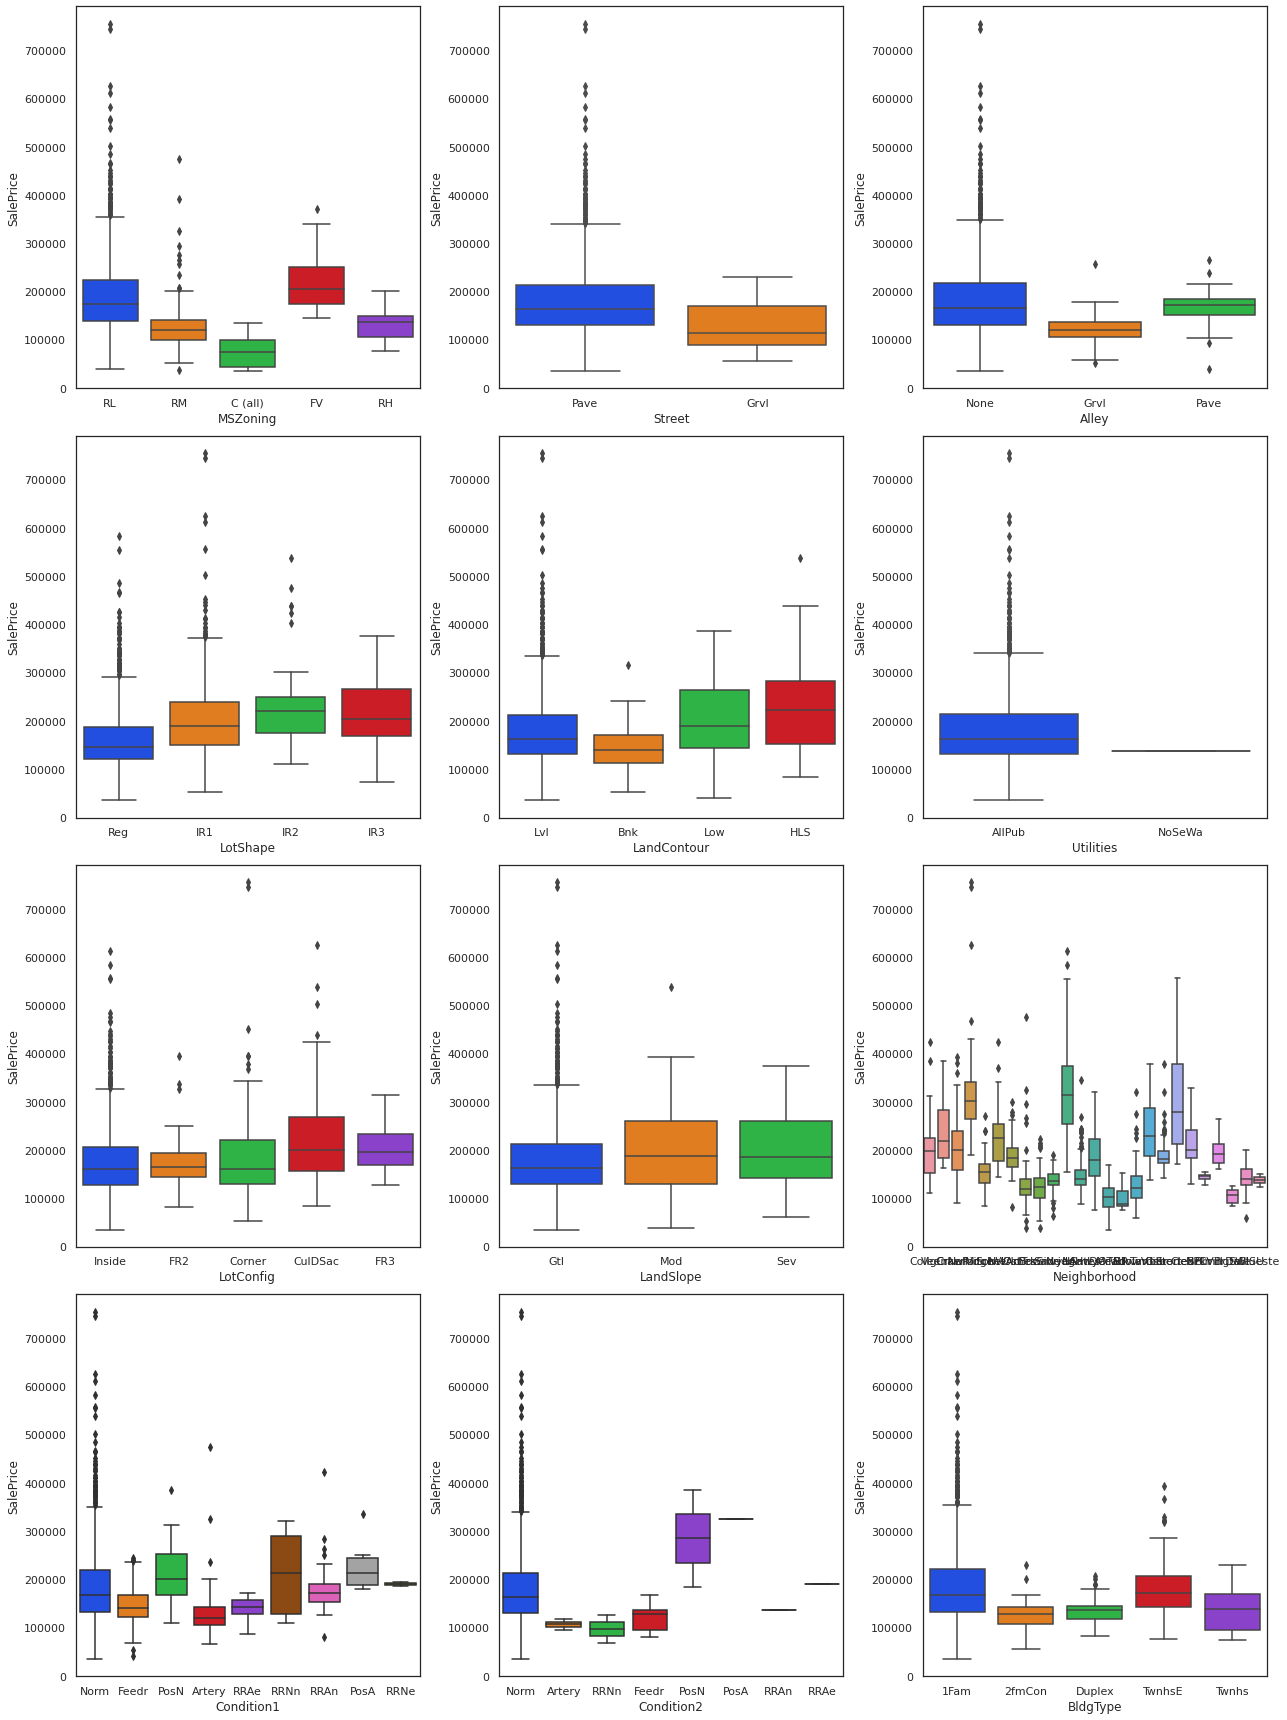

In [ ]:
#Box plot to find fields with outliers

rows = 4
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols*6,rows*6))

#numeric_field = []
#numeric_field = num_fields.remove('Id')

for r in range(0,rows):
    for c in range(0,cols):  
        i = r*cols+c
        if i < len(cat_fields):
            sns.boxplot(x=cat_fields[i], y='SalePrice', data=train_df, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()  

### I am not able to find correlation for categorical in a same way I did for numeric variable. I used the function shared in the article below:

<i>Going categorical
What we need is something that will look like correlation, but will work with categorical values — or more formally, we’re looking for a measure of association between two categorical features. Introducing: Cramér’s V. It is based on a nominal variation of Pearson’s Chi-Square Test, and comes built-in with some great benefits:
Similarly to correlation, the output is in the range of [0,1], where 0 means no association and 1 is full association. (Unlike correlation, there are no negative values, as there’s no such thing as a negative association. Either there is, or there isn’t)
Like correlation, Cramer’s V is symmetrical — it is insensitive to swapping x and y</i>

https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9


In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
# Correlation between variables

#for i in range(0,len(cat_fields)):
 # for j in range(i+1,len(cat_fields)):
   # cat_corr = cramers_v(train_df[cat_fields[i]], train_df[cat_fields[i]])
   # if(cat_corr > .99):
     # print("Correlation between {} and {} is: {}".format(cat_fields[i], cat_fields[j], cat_corr ))


In [ ]:
# Correlation of variables with saleprice

cat_stng_corr = []
cat_weak_corr = []
data1 = []


for i in range(0,len(cat_fields)):
  cat_corr = cramers_v(train_df[cat_fields[i]], train_df['SalePrice'])
  data1.append([cat_fields[i], cat_corr])
  if(cat_corr>0.30):
    cat_stng_corr.append(cat_fields[i])
    print("Correlation between {} and {} is: {}".format(cat_fields[i], 'SalePrice', cat_corr ))
  else:
    cat_weak_corr.append(cat_fields[i])

  
cat_corr_df = pd.DataFrame(data1, columns=['Field_Name','Corr_with_SalePrice'])

cat_stng_corr.append('SalePrice')
print(cat_stng_corr)
print('\n')
print(cat_weak_corr)
print('\n')
cat_corr_df.sort_values(by = ['Corr_with_SalePrice'], ascending = False)

Correlation between Street and SalePrice is: 0.3934516814280061
Correlation between LotShape and SalePrice is: 0.3240087213186113
Correlation between ExterQual and SalePrice is: 0.44418679896862595
Correlation between ExterCond and SalePrice is: 0.3053512909406099
Correlation between BsmtQual and SalePrice is: 0.39361711377532815
Correlation between BsmtCond and SalePrice is: 0.35565634673839774
Correlation between BsmtExposure and SalePrice is: 0.31567727476370555
Correlation between Heating and SalePrice is: 0.3495940524717798
Correlation between CentralAir and SalePrice is: 0.33568164198038897
Correlation between KitchenQual and SalePrice is: 0.43429939078961693
Correlation between GarageFinish and SalePrice is: 0.30918315639131877
['Street', 'LotShape', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'Heating', 'CentralAir', 'KitchenQual', 'GarageFinish', 'SalePrice']


['MSZoning', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Co

,Field_Name,Corr_with_SalePrice
18,ExterQual,0.444187
30,KitchenQual,0.434299
21,BsmtQual,0.393617
1,Street,0.393452
22,BsmtCond,0.355656
26,Heating,0.349594
28,CentralAir,0.335682
3,LotShape,0.324009
23,BsmtExposure,0.315677
34,GarageFinish,0.309183


### The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the housing price tends to go up when the Kitchen, Exterior and Basement quality is good. When the coefficient is close to –1, it means that there is a strong negative correlation;Finally, coefficients close to 0 mean that there is no linear correlation.

In [ ]:
cat_stng_corr
cat_predictors = cat_corr_df[cat_corr_df.Corr_with_SalePrice >= .30]

# top three categorical predictors
cat_predictors.sort_values(by='Corr_with_SalePrice', ascending=False).head(5)

['Street',
 'LotShape',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'Heating',
 'CentralAir',
 'KitchenQual',
 'GarageFinish',
 'SalePrice']

,Field_Name,Corr_with_SalePrice
18,ExterQual,0.444187
30,KitchenQual,0.434299
21,BsmtQual,0.393617
1,Street,0.393452
22,BsmtCond,0.355656


In [ ]:
#cat_stng_corr.append('SalePrice')
train_df_cat = train_df[cat_stng_corr]
train_df_cat.head()


,Street,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,Heating,CentralAir,KitchenQual,GarageFinish,SalePrice
0,Pave,Reg,Gd,TA,Gd,TA,No,GasA,Y,Gd,RFn,208500
1,Pave,Reg,TA,TA,Gd,TA,Gd,GasA,Y,TA,RFn,181500
2,Pave,IR1,Gd,TA,Gd,TA,Mn,GasA,Y,Gd,RFn,223500
3,Pave,IR1,TA,TA,TA,Gd,No,GasA,Y,Gd,Unf,140000
4,Pave,IR1,Gd,TA,Gd,TA,Av,GasA,Y,Gd,RFn,250000


In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(train_df, x="YearBuilt", y="SalePrice", color="GarageFinish", 
                 marginal_x="box", marginal_y="violin",
                  title="SalesPrice distribution against Year built and Garage Finished ")
fig.show()

*italicized text*# We will plot countplot for categorical value with strong correlation

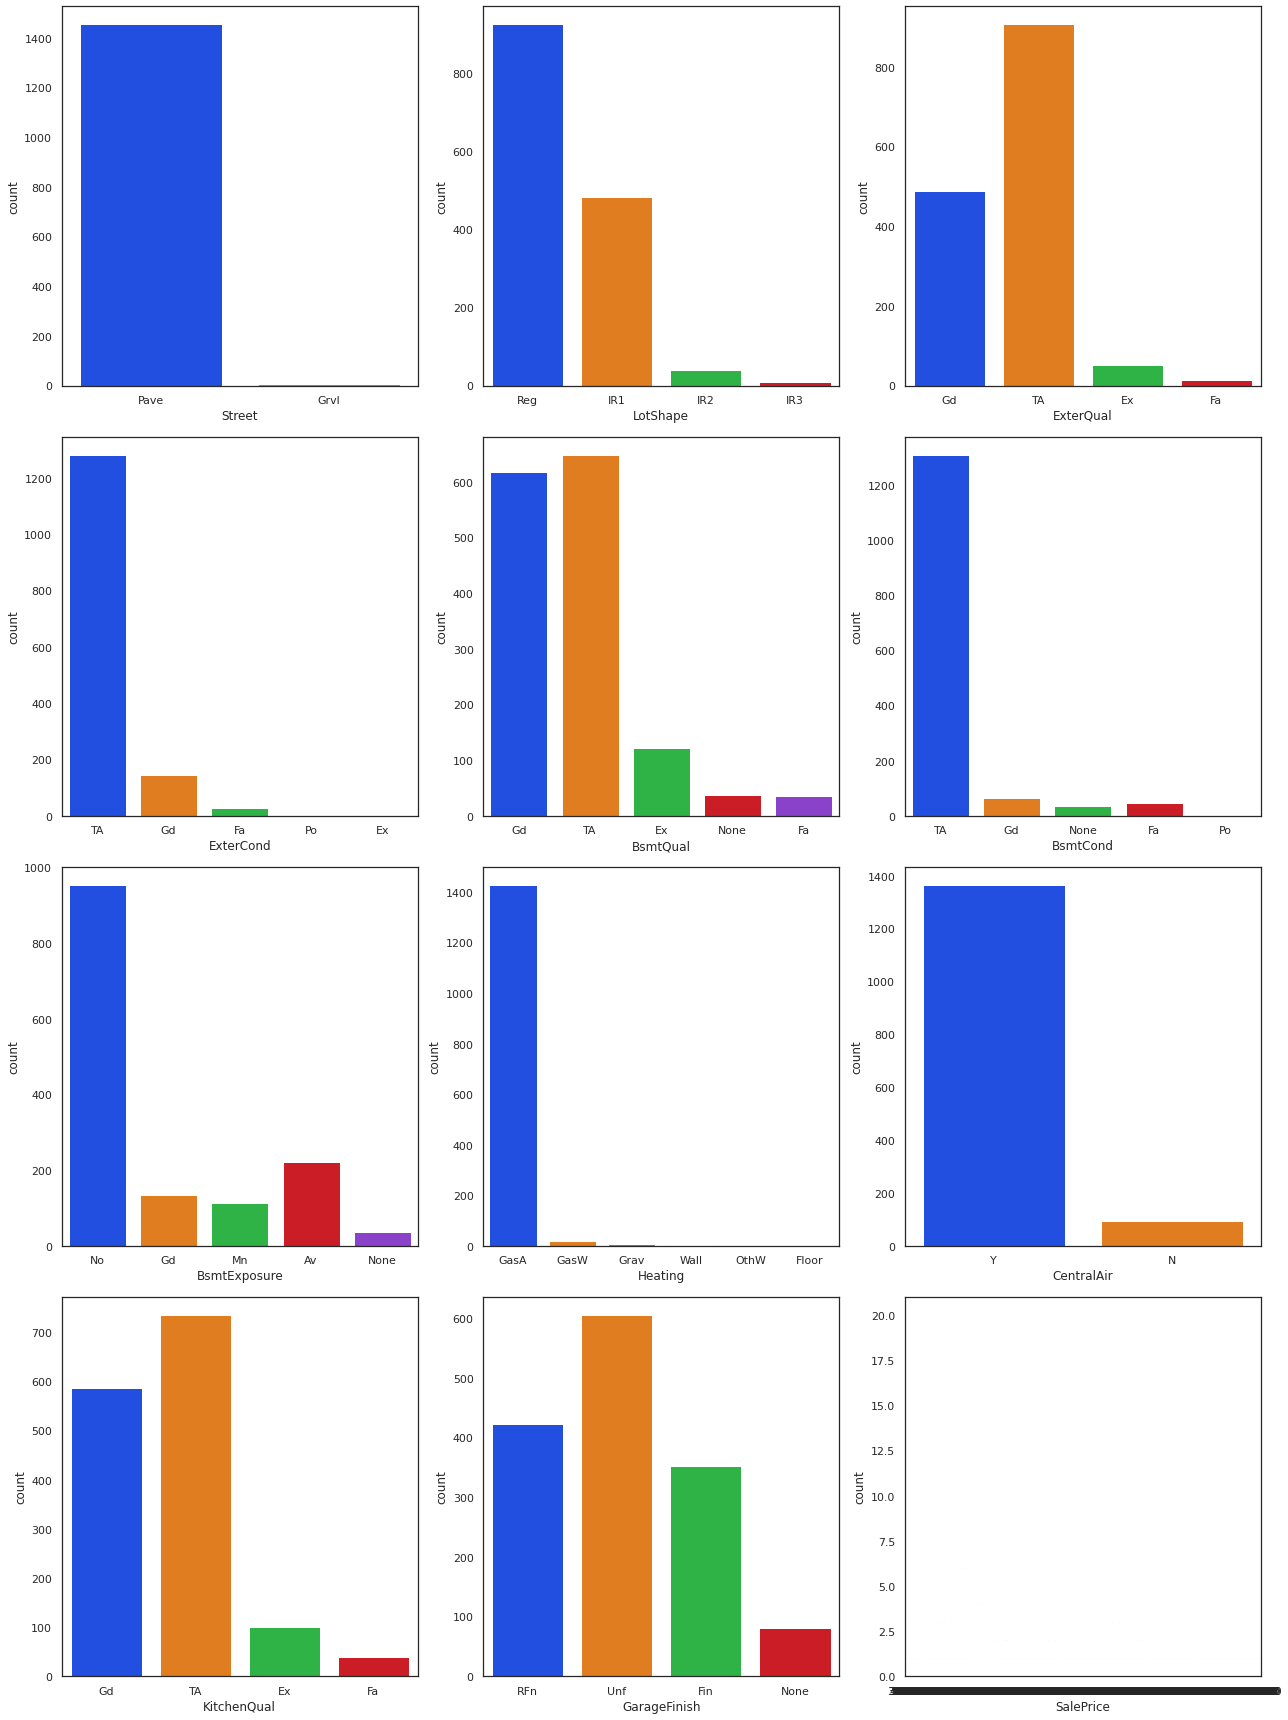

In [ ]:
# Analyze each category using barplot
#https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/

rows = 4
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols*6,rows*6))

for r in range(0,rows):
    for c in range(0,cols):  
        i = r*cols+c
        if i < len(cat_stng_corr):
            sns.countplot(x=cat_stng_corr[i], data=train_df_cat, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()   



## ## As we can see in the bar plot, for few of the features there is one category for most of the records. For example - 'Pave' street. I would rather prefer the predictors with mix categories. For example - Garage Finish, Kitchen Quality, Basement exposure, Lot shape.

<Figure size 720x432 with 0 Axes>

[None, None, None, None, None, None, None, None, None, None, None, None]

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

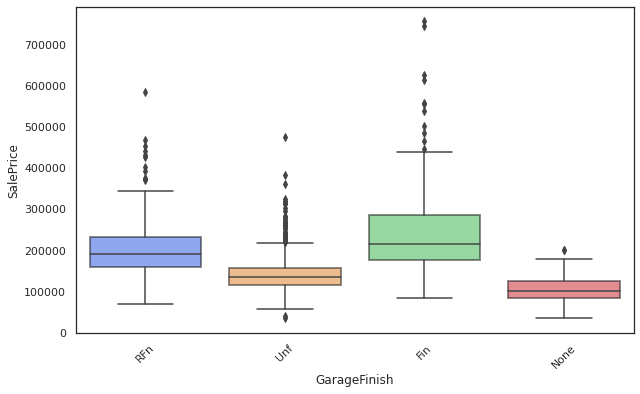

In [ ]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='GarageFinish', y='SalePrice', data=train_df_cat)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

<Figure size 720x432 with 0 Axes>

[None, None, None, None, None, None, None, None, None, None, None, None]

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

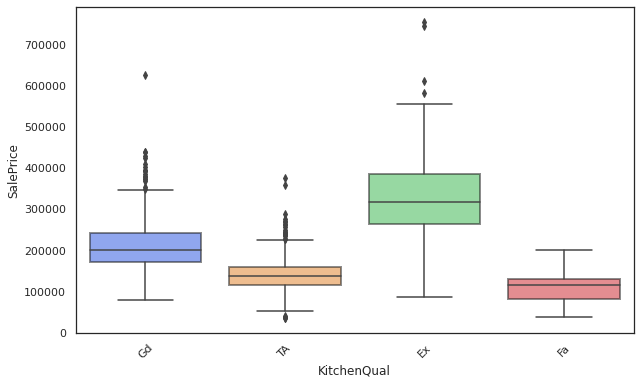

In [ ]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='KitchenQual', y='SalePrice', data=train_df_cat)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

<Figure size 720x432 with 0 Axes>

[None, None, None, None, None, None, None, None, None, None, None, None]

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

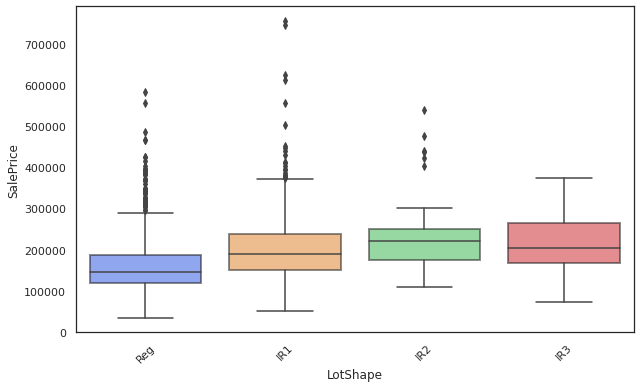

In [ ]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='LotShape', y='SalePrice', data=train_df_cat)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [ ]:
# Feature Creation